<a href="https://colab.research.google.com/github/FantySantos/Estatistica_e_LLMs/blob/main/Atividade_1_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 — Z-score e Binomial Distribution Sample distribution and sampling distribution TLC p-value

Atividade apresentada como parte da avaliação da disciplina Tópicos especiais: Introdução à Estatística e LLMs ministrada pelo professor Claudomiro de Souza de Sales Junior para o curso
de Sistemas de Informação do Instituto de Ciências Exatas
e Naturais da Universidade Federal do Pará - Campus
Guamá.

Aluna: Fantiny Santos dos Santos 202211140005

---

## Preparação do Ambiente

In [1]:
import kagglehub
from scipy.stats import norm
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import math
import pandas as pd
pd.options.plotting.backend = "plotly"

## Parte 2 — Sample distribution and sampling distribution, TLC and p-value

### Questão A - A partir do que foi feito na Atividade 2 "Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho", crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

#### Contextualização

Considere que a população de pacientes estudada (Atividade 1 - Parte 1: Questão B), definida anteriormente, é extremamente extensa. Na prática, raramente temos acesso aos dados completos de toda uma população. O mais comum é trabalharmos com amostras pequenas, como grupos de 50 pacientes, para então realizar inferências sobre o comportamento geral da variável de interesse.

#### Carregando os dados da Questão B - Parte 1

##### Como o notebook desta atividade precisou ser dividido em duas partes para manter a organização e evitar excesso de conteúdo, nesta segunda parte retomamos a estrutura necessária: carregamos novamente o dataset utilizado na Atividade B – Parte 1 e reconstruímos os dados artificiais gerados anteriormente, porém, com o tamanho de 100000 registros.

In [2]:
df = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    "diabetes.csv",
)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


In [3]:
np.random.seed(42)
glucose_artificial = np.random.normal(df['Glucose'].mean(), df['Glucose'].std(), 100000)

#### Sample Distribution

Refere-se à distribuição dos dados dentro de uma única amostra de tamanho n. Espera-se que ela se assemelhe à distribuição da população, mas com mais "ruído" e irregularidades devido ao tamanho reduzido.

In [4]:
amostra_unica = np.random.choice(glucose_artificial, 50)

In [5]:
fig = px.histogram(x=amostra_unica, histnorm='probability density', title="Histograma e distribuição de uma única amostra dos dados artificiais de glicose", labels={'x': 'Glucose'})

xmin, xmax = min(amostra_unica), max(amostra_unica)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(amostra_unica)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
))
fig.show()

#### Sampling Distribution

É a distribuição das médias de várias amostras retiradas da população. Pelo Teorema do Limite Central, mesmo que a população não fosse normal, a distribuição das médias tende a ser normal.

In [6]:
medias_amostrais = [np.mean(np.random.choice(glucose_artificial, 50)) for _ in range(200)]

In [7]:
fig = px.histogram(x=medias_amostrais, histnorm='probability density', title="Histograma e distribuição das médias de 200 amostras dos dados artificiais de glicose", labels={'x': 'Glucose'})

xmin, xmax = min(medias_amostrais), max(medias_amostrais)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(medias_amostrais)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
))

fig.show()

#### Distribuição da População, das Médias de 200 Amostras e da Curva do Teorema do Limite Central

O Erro Padrão (Standard Error): A característica mais importante da Sampling Distribution é que ela é muito mais "estreita" que a população. O desvio padrão das médias (chamado de Erro Padrão) é calculado por:

<div align="center">

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

**Equação 1: Equação do Erro Padrão**

</div>

In [39]:
xmin, xmax = min(glucose_artificial), max(glucose_artificial)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(glucose_artificial)
pdf = norm.pdf(x, mu, sigma)

fig = px.scatter(
    x=x,
    y=pdf / max(pdf),
    labels={
        "x": "Glucose",
        "y": f"Normal Fit (μ={mu:.2f}, σ={sigma:.2f})"
    },
    title="Distribuição da População, das Médias de 200 Amostras e da Curva do Teorema do Limite Central"
)

erro_padrao = sigma / math.sqrt(50)
curva_tlc = np.random.normal(mu, erro_padrao, 100000)
xmin, xmax = min(curva_tlc), max(curva_tlc)
x = np.linspace(xmin, xmax, 1000)
pdf_tlc = norm.pdf(x, mu, erro_padrao)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf_tlc / max(pdf_tlc),
    mode='lines',
    name=f'Normal Fit TLC (μ={mu:.2f}, σμ={erro_padrao:.2f})',
))

xmin, xmax = min(medias_amostrais), max(medias_amostrais)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(medias_amostrais)
pdf_sampling = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf_sampling / max(pdf_sampling),
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σμ={sigma:.2f})',
))

fig.show()

#### Avaliação de Probabilidade de um Evento

##### Qual a probabilidade da média de glicose de um grupo de 50 pacientes ser maior que 130mg/dL?

Ao calcularmos probabilidades sobre a média de um grupo (e não sobre um indivíduo), devemos usar $\sigma_{\bar{x}}$ no denominador do Z-Score:

<div align="center">

  $$
  z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}
  $$

  **Equação 2: Z-Score para a média amostral**

</div>

In [41]:
mu, sigma = norm.fit(glucose_artificial)
erro_padrao = sigma / math.sqrt(50)
valor_interesse = 130

In [42]:
z_sampling = (valor_interesse - mu) / erro_padrao
z_sampling

np.float64(2.005123171446862)

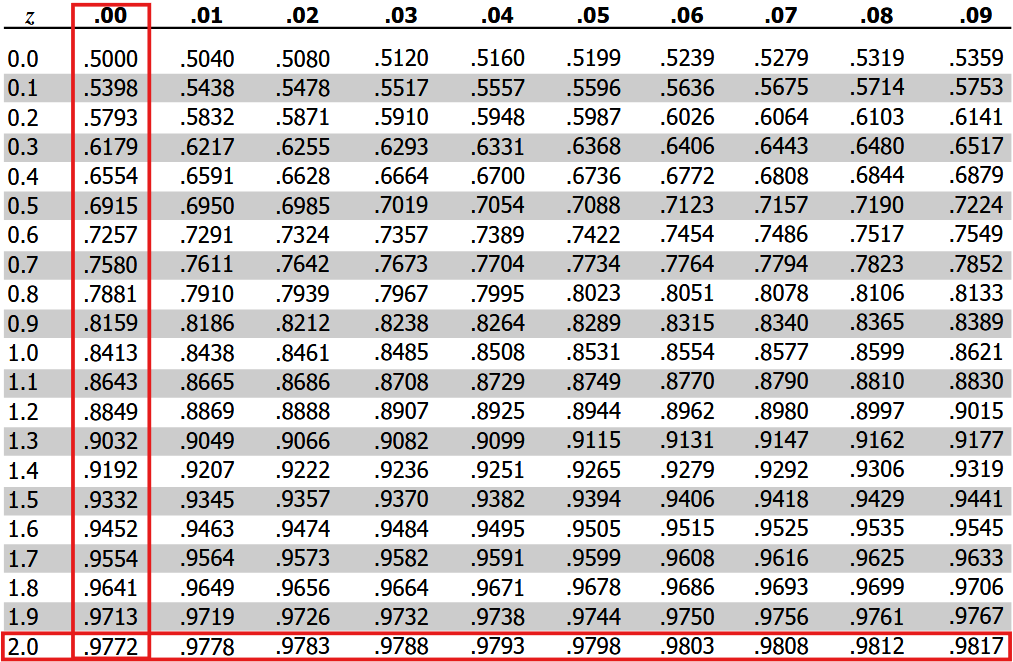

In [44]:
(1 - 0.9772) * 100

2.2800000000000042

Assim temos que a probabilidade da glicose média de um grupo de 50 pacientes ser > 130, é de 2.28%

### Questão B - Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.